# Example 2: Use default processing graphs to pre-process a time series of Sentinel-1 Level-1 SLC images

## 1. Requirements

- Installation of SenSARP
- Installation of ESA's SNAP Toolbox version >8.0.3
    - Currently only SNAP version 8.0 can be downloaded from the ESA website (https://step.esa.int/main/download/snap-download/). To update SNAP to a version >8.0.3 please start the SNAP software. You will be asked if you want to search for update. After the updates are installed you need to restart SNAP to initialize the installed updates.
    - SNAP Toolbox need libgfortran for specific operations but currently libgfortran is not installed during the installation process of SNAP therefore you might use ```sudo apt-get install gfortran```

- Sentinel-1 SLC data
    - Instruction how to download Sentinel 1 data are given in Section 2

## 2. Download sample data from Sentinel Data Hub
### Option 1: Download data from Sentinel Data Hub manually or via python package sentinelsat

 <span style="color:red">Create Account (https://scihub.copernicus.eu/dhus/#/self-registration)</span>. (**<span style="color:red">Attention: Problem by using Copernicus Open Access Hub might be that older data is offline and need to be triggered first</span>)**. More information can be found at https://scihub.copernicus.eu/userguide/DataRestoration. Instruction to manually download data from Copernicus Open Access Hub can be found at https://blogs.fu-berlin.de/reseda/esa-scihub/. You can also try to download the data via python package sentinelsat

### How to use sentinelsat

In [1]:
# connect to the API
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
user = 'user'
password = 'password'
# initialize settings
api = SentinelAPI(user, password)

Search for available data

In [2]:
# search by polygon (MNI test site coordinates), time, and SciHub query keywords
footprint = geojson_to_wkt(read_geojson('coordinates_mni.geojson'))
products = api.query(footprint,
                     date=('20210101', '20210110'),
                     platformname='Sentinel-1',
                     producttype='SLC')
print('Following products will be downloaded')
print(api.to_dataframe(products).title.values)

print('These {} product need {} Gb of disk space'.format(len(products), api.get_products_size(products)))

Following products will be downloaded
['S1A_IW_SLC__1SDH_20210109T170737_20210109T170801_036064_043A0F_7B82'
 'S1A_IW_SLC__1SDV_20210108T051816_20210108T051844_036042_04393F_F99A'
 'S1B_IW_SLC__1SDV_20210107T052547_20210107T052614_025044_02FB1E_E0E4'
 'S1A_IW_SLC__1SDV_20210104T165938_20210104T170006_035991_043767_329F'
 'S1A_IW_SLC__1SDV_20210104T165913_20210104T165940_035991_043767_A0D0'
 'S1B_IW_SLC__1SDV_20210103T170648_20210103T170715_024993_02F97C_C72A'
 'S1B_IW_SLC__1SDV_20210102T051747_20210102T051814_024971_02F8D2_6318'
 'S1A_IW_SLC__1SDV_20210101T052626_20210101T052654_035940_0435A9_E0CB']
These 8 product need 59.76 Gb of disk space


Start download process (**<span style="color:red">Attention: might take a while and data will requries some free disk space</span>)**

In [3]:
# download all results from the search
# files will be downloaded to specified path
import os
path = os.path.expanduser('~/Desktop/data2')
try:
    os.makedirs(path)
except: FileExistsError
api.download_all(products, path)

ResultTuple(downloaded={'4c653f3d-2df7-4a76-ac3a-01abedbc0232': {'id': '4c653f3d-2df7-4a76-ac3a-01abedbc0232', 'title': 'S1B_IW_SLC__1SDV_20210107T052547_20210107T052614_025044_02FB1E_E0E4', 'size': 4498240977, 'md5': '893B94C6E001FE655099F218950A5109', 'date': datetime.datetime(2021, 1, 7, 5, 25, 47, 737000), 'footprint': 'POLYGON((12.658003 47.727371,9.287686 48.122635,9.664155 49.737373,13.147094 49.340591,12.658003 47.727371))', 'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('4c653f3d-2df7-4a76-ac3a-01abedbc0232')/$value", 'Online': True, 'Creation Date': datetime.datetime(2021, 1, 7, 10, 45, 2, 244000), 'Ingestion Date': datetime.datetime(2021, 1, 7, 10, 38, 7, 194000), 'quicklook_url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('4c653f3d-2df7-4a76-ac3a-01abedbc0232')/Products('Quicklook')/$value", 'path': '/home/test/Desktop/data2/S1B_IW_SLC__1SDV_20210107T052547_20210107T052614_025044_02FB1E_E0E4.zip'}, '5ade5549-a789-45c3-8272-c1dd61295340': {'id': '5

### Option 2: Manually search and download data from Alaska Satellite Facility (ASF)

You can search for Sentinel-1 data at https://search.asf.alaska.edu/. A NASA EOSDIS Earthdata Login account is required for downloading data and tools from ASF. Registering for an Earthdata Login account is free (https://urs.earthdata.nasa.gov/home). Instructions how to download data from ASF can be found at https://asf.alaska.edu/wp-content/uploads/2019/02/asf_datarecipe_bulk_download_from_vertex_python_script_v1.pdf.

## 3. Use default processing graph to pre-process a time series of Sentinel-1 Level-1 SLC images

Set paths for

- input_folder (path to stored Sentinel-1 SLC data (zip files) e.g. "~/Downloads")
- output_folder (path where processed data will be stored e.g. "~/output")
- gpt_loction (gpt is located in the bin folder of your SNAP installation)' 

In [4]:
input_folder = path
output_folder = path
gpt_location = os.path.expanduser('~/snap/bin/gpt')

Create config file with information about input, output and gpt location

In [5]:
import yaml

with open('sample_config_file.yaml') as stream:
   data = yaml.safe_load(stream)

data['input_folder'] = input_folder
data['output_folder'] = output_folder
data['gpt'] = gpt_location

with open('test_config_file.yaml', 'wb') as stream:
   yaml.safe_dump(data, stream, default_flow_style=False, 
                  explicit_start=True, allow_unicode=True, encoding='utf-8')

Set optional config options

In [6]:
with open('test_config_file.yaml') as stream:
   data = yaml.safe_load(stream)

# Filter option
## Filter via year of interes
data['year'] = '2021'

## Define region of interest
data['region']['lr']['lat'] = 48.2 # lower right latitude
data['region']['lr']['lon'] = 11.9 # lower right longitude
data['region']['ul']['lat'] = 48.4 # upper left latitude
data['region']['ul']['lon'] = 11.6 # upper left longitude
data['region']['subset'] = 'yes'

## Define multi-temporal filtering properties
data['speckle_filter']['multi_temporal']['apply'] = 'yes'
data['speckle_filter']['multi_temporal']['files'] = '5' # Number of files used for multi temporal filtering

## Define incidence angle for normalization
data['normalization_angle'] = '35'

with open('test_config_file.yaml', 'wb') as stream:
   yaml.safe_dump(data, stream, default_flow_style=False, 
                  explicit_start=True, allow_unicode=True, encoding='utf-8')

Start pre-processing steps

In [7]:
from sar_pre_processing.sar_pre_processor import *
import warnings
warnings.filterwarnings("ignore")

processing = SARPreProcessor(config='test_config_file.yaml')
processing.create_processing_file_list()
print('start step 1')
processing.pre_process_step1()
print('start step 2')
processing.pre_process_step2()
print('start step 3')
processing.pre_process_step3()
print('start add netcdf information')
processing.add_netcdf_information()
print('start create netcdf stack')
processing.create_netcdf_stack()

INFO:root:Found files within input folder: 10
INFO:root:Number of found files for year 2021: 10
INFO:root:area of interest not specified
INFO:root:Number of found files that were double processed: 0.0
INFO:root:Number of found files with border issues: 4
INFO:root:area of interest specified
INFO:root:normalisation angle not specified, default value of 35 is used for processing
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:root:Process S1A_IW_SLC__1SDH_20210109T170737_20210109T170801_036064_043A0F_7B82.zip with SNAP.


start step 1


INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.engine_utilities.download.DownloadableContentImpl: http retrieving http://step.esa.int/auxdata/orbits/Sentinel-1/POEORB/S1A/2021/01/S1A_OPER_AUX_POEORB_OPOD_20210129T120952_V20210108T225942_20210110T005942.EOF.zip

INFO:root:1
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:root:Process S1A_IW_SLC__1SDV_20210101T052626_20210101T052654_035940_0435A9_E0CB.zip with SNAP.


 done.


INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.engine_utilities.download.DownloadableContentImpl: http retrieving http://step.esa.int/auxdata/orbits/Sentinel-1/POEORB/S1A/2020/12/S1A_OPER_AUX_POEORB_OPOD_20210121T121629_V20201231T225942_20210102T005942.EOF.zip


...12%...24%...36%...48%...60%...72%...84%.. done.


INFO:root:0
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:root:Process S1A_IW_SLC__1SDV_20210108T051816_20210108T051844_036042_04393F_F99A.zip with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.engine_utilities.download.DownloadableContentImpl: http retrieving http://step.esa.int/auxdata/orbits/Sentinel-1/POEORB/S1A/2021/01/S1A_OPER_AUX_POEORB_OPOD_20210128T121545_V20210107T225942_20210109T005942.EOF.zip


....11%....23%....34%....46%....57%....69%....80%.... done.


INFO:root:0
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:root:Process S1B_IW_SLC__1SDV_20210102T051747_20210102T051814_024971_02F8D2_6318.zip with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.engine_utilities.download.DownloadableContentImpl: http retrieving http://step.esa.int/auxdata/orbits/Sentinel-1/POEORB/S1B/2021/01/S1B_OPER_AUX_POEORB_OPOD_20210122T111559_V20210101T225942_20210103T005942.EOF.zip


...12%...24%..34%...46%...58%..68%...80%... done.


INFO:root:0
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:root:Process S1B_IW_SLC__1SDV_20210103T170648_20210103T170715_024993_02F97C_C72A.zip with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.engine_utilities.download.DownloadableContentImpl: http retrieving http://step.esa.int/auxdata/orbits/Sentinel-1/POEORB/S1B/2021/01/S1B_OPER_AUX_POEORB_OPOD_20210123T111611_V20210102T225942_20210104T005942.EOF.zip


..10%..20%..31%..41%...51%..62%..72%..83%.. done.


INFO:root:0
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:root:Process S1B_IW_SLC__1SDV_20210107T052547_20210107T052614_025044_02FB1E_E0E4.zip with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.engine_utilities.download.DownloadableContentImpl: http retrieving http://step.esa.int/auxdata/orbits/Sentinel-1/POEORB/S1B/2021/01/S1B_OPER_AUX_POEORB_OPOD_20210127T111615_V20210106T225942_20210108T005942.EOF.zip


...12%...24%..34%...46%...58%..68%...80%... done.


INFO:root:0
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:root:Process S1A_IW_SLC__1SDV_20210104T165913_20210104T165940_035991_043767_A0D0.zip with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.engine_utilities.download.DownloadableContentImpl: http retrieving http://step.esa.int/auxdata/orbits/Sentinel-1/POEORB/S1A/2021/01/S1A_OPER_AUX_POEORB_OPOD_20210124T121622_V20210103T225942_20210105T005942.EOF.zip


....12%....24%...34%....46%....58%...68%....80%...90% done.


INFO:root:0
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:root:Process S1B_IW_SLC__1SDV_20210110T165830_20210110T165857_025095_02FCB9_7015.zip with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.engine_utilities.download.DownloadableContentImpl: http retrieving http://step.esa.int/auxdata/orbits/Sentinel-1/POEORB/S1B/2021/01/S1B_OPER_AUX_POEORB_OPOD_20210130T110934_V20210109T225942_20210111T005942.EOF.zip


...11%...23%...34%...45%..55%...66%...78%...90% done.


INFO:root:0
INFO:root:skip processing for /home/test/Desktop/data2/S1A_IW_SLC__1SDH_20210109T170737_20210109T170801_036064_043A0F_7B82.zip. File does not exist
INFO:root:skip processing for /home/test/Desktop/data2/S1A_IW_SLC__1SDV_20210104T165938_20210104T170006_035991_043767_329F.zip. File does not exist
INFO:root:skip processing for /home/test/Desktop/data2/S1B_IW_SLC__1SDV_20210110T165855_20210110T165922_025095_02FCB9_4BB8.zip. File does not exist
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:root:Scene 1 of 7
INFO:root:Process S1A_IW_SLC__1SDV_20210101T052626_20210101T052654_035940_0435A9_E0CB_GC_RC_No_Su.dim with SNAP.


start step 2


INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start


...12%...25%..35%..45%...57%..67%..77%...89% done.


-- org.jblas INFO Deleting /tmp/jblas7850174183669672141/libjblas.so
-- org.jblas INFO Deleting /tmp/jblas7850174183669672141/libgfortran-4.so
-- org.jblas INFO Deleting /tmp/jblas7850174183669672141/libjblas_arch_flavor.so
-- org.jblas INFO Deleting /tmp/jblas7850174183669672141/libquadmath-0.so
-- org.jblas INFO Deleting /tmp/jblas7850174183669672141
INFO:root:0
INFO:root:2021-08-29 18:57:58.801427
INFO:ComponentProgress:14
INFO:ComponentProgress:14
INFO:root:Scene 2 of 7
INFO:root:Process S1A_IW_SLC__1SDV_20210104T165913_20210104T165940_035991_043767_A0D0_GC_RC_No_Su.dim with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP expe

Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to

...12%...25%..35%..45%...57%..67%..77%...89% done.


-- org.jblas INFO Deleting /tmp/jblas8286044915352018441/libjblas.so
-- org.jblas INFO Deleting /tmp/jblas8286044915352018441/libgfortran-4.so
-- org.jblas INFO Deleting /tmp/jblas8286044915352018441/libjblas_arch_flavor.so
-- org.jblas INFO Deleting /tmp/jblas8286044915352018441/libquadmath-0.so
-- org.jblas INFO Deleting /tmp/jblas8286044915352018441
INFO:root:0
INFO:root:2021-08-29 18:59:12.674310
INFO:ComponentProgress:28
INFO:ComponentProgress:28
INFO:root:Scene 3 of 7
INFO:root:Process S1A_IW_SLC__1SDV_20210108T051816_20210108T051844_036042_04393F_F99A_GC_RC_No_Su.dim with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP expe

Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to

...12%...25%..35%..45%...57%..67%..77%...89% done.


-- org.jblas INFO Deleting /tmp/jblas1941578135814371655/libjblas.so
-- org.jblas INFO Deleting /tmp/jblas1941578135814371655/libgfortran-4.so
-- org.jblas INFO Deleting /tmp/jblas1941578135814371655/libjblas_arch_flavor.so
-- org.jblas INFO Deleting /tmp/jblas1941578135814371655/libquadmath-0.so
-- org.jblas INFO Deleting /tmp/jblas1941578135814371655
INFO:root:0
INFO:root:2021-08-29 19:00:26.270922
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:root:Scene 4 of 7
INFO:root:Process S1B_IW_SLC__1SDV_20210102T051747_20210102T051814_024971_02F8D2_6318_GC_RC_No_Su.dim with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP expe

Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to

...12%...25%..35%..45%...57%..67%..77%...89% done.


-- org.jblas INFO Deleting /tmp/jblas5133865250962490398/libjblas.so
-- org.jblas INFO Deleting /tmp/jblas5133865250962490398/libgfortran-4.so
-- org.jblas INFO Deleting /tmp/jblas5133865250962490398/libjblas_arch_flavor.so
-- org.jblas INFO Deleting /tmp/jblas5133865250962490398/libquadmath-0.so
-- org.jblas INFO Deleting /tmp/jblas5133865250962490398
INFO:root:0
INFO:root:2021-08-29 19:01:57.069051
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:root:Scene 5 of 7
INFO:root:Process S1B_IW_SLC__1SDV_20210103T170648_20210103T170715_024993_02F97C_C72A_GC_RC_No_Su.dim with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP expe

Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to

...12%...25%..35%..45%...57%..67%..77%...89% done.


-- org.jblas INFO Deleting /tmp/jblas8785853447239672772/libjblas.so
-- org.jblas INFO Deleting /tmp/jblas8785853447239672772/libgfortran-4.so
-- org.jblas INFO Deleting /tmp/jblas8785853447239672772/libjblas_arch_flavor.so
-- org.jblas INFO Deleting /tmp/jblas8785853447239672772/libquadmath-0.so
-- org.jblas INFO Deleting /tmp/jblas8785853447239672772
INFO:root:0
INFO:root:2021-08-29 19:03:24.549310
INFO:ComponentProgress:71
INFO:ComponentProgress:71
INFO:root:Scene 6 of 7
INFO:root:Process S1B_IW_SLC__1SDV_20210107T052547_20210107T052614_025044_02FB1E_E0E4_GC_RC_No_Su.dim with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP expe

Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to

...12%...25%..35%..45%...57%..67%..77%...89% done.


-- org.jblas INFO Deleting /tmp/jblas7411179791605111946/libjblas.so
-- org.jblas INFO Deleting /tmp/jblas7411179791605111946/libgfortran-4.so
-- org.jblas INFO Deleting /tmp/jblas7411179791605111946/libjblas_arch_flavor.so
-- org.jblas INFO Deleting /tmp/jblas7411179791605111946/libquadmath-0.so
-- org.jblas INFO Deleting /tmp/jblas7411179791605111946
INFO:root:0
INFO:root:2021-08-29 19:04:35.352154
INFO:ComponentProgress:85
INFO:ComponentProgress:85
INFO:root:Scene 7 of 7
INFO:root:Process S1B_IW_SLC__1SDV_20210110T165830_20210110T165857_025095_02FCB9_7015_GC_RC_No_Su.dim with SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP expe

Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to 2404
INFO: org.esa.snap.core.datamodel.Product: raster width 2403 not equal to

...12%...25%..35%..45%...57%..67%..77%...89% done.


-- org.jblas INFO Deleting /tmp/jblas2590257929860331368/libjblas.so
-- org.jblas INFO Deleting /tmp/jblas2590257929860331368/libgfortran-4.so
-- org.jblas INFO Deleting /tmp/jblas2590257929860331368/libjblas_arch_flavor.so
-- org.jblas INFO Deleting /tmp/jblas2590257929860331368/libquadmath-0.so
-- org.jblas INFO Deleting /tmp/jblas2590257929860331368
INFO:root:0
INFO:root:2021-08-29 19:05:54.247359
INFO:root:skip processing for /home/test/Desktop/data2/S1A_IW_SLC__1SDH_20210109T170737_20210109T170801_036064_043A0F_7B82.zip. File /home/test/Desktop/data2/step2/S1A_IW_SLC__1SDH_20210109T170737_20210109T170801_036064_043A0F_7B82_GC_RC_No_Su_Co.dim does not exist.
INFO:root:skip processing for /home/test/Desktop/data2/S1A_IW_SLC__1SDV_20210104T165938_20210104T170006_035991_043767_329F.zip. File /home/test/Desktop/data2/step2/S1A_IW_SLC__1SDV_20210104T165938_20210104T170006_035991_043767_329F_GC_RC_No_Su_Co.dim does not exist.
INFO:root:skip processing for /home/test/Desktop/data2/S1B_IW_

start step 3


INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start


...10%....22%....34%....45%...

29455 [main] INFO serverStartup - Nc4Iosp: NetCDF-4 C library loaded (jna_path='/home/test/.snap/auxdata/netcdf_natives/8.0.5/amd64', libname='netcdf').
29500 [main] INFO serverStartup - NetcdfLoader: set log level: old=0 new=0
29501 [main] INFO serverStartup - Nc4Iosp: set log level: old=0 new=0


55%....67%....79%....90% done.


INFO:root:0
INFO:root:2021-08-29 19:08:56.411130
INFO:ComponentProgress:14
INFO:ComponentProgress:14
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start


...10%....22%....34%....45%...

21992 [main] INFO serverStartup - Nc4Iosp: NetCDF-4 C library loaded (jna_path='/home/test/.snap/auxdata/netcdf_natives/8.0.5/amd64', libname='netcdf').
22011 [main] INFO serverStartup - NetcdfLoader: set log level: old=0 new=0
22012 [main] INFO serverStartup - Nc4Iosp: set log level: old=0 new=0


55%....67%....79%....90% done.


INFO:root:0
INFO:root:2021-08-29 19:11:42.027038
INFO:ComponentProgress:28
INFO:ComponentProgress:28
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start


...10%....22%....34%....45%...

21802 [main] INFO serverStartup - Nc4Iosp: NetCDF-4 C library loaded (jna_path='/home/test/.snap/auxdata/netcdf_natives/8.0.5/amd64', libname='netcdf').
21810 [main] INFO serverStartup - NetcdfLoader: set log level: old=0 new=0
21828 [main] INFO serverStartup - Nc4Iosp: set log level: old=0 new=0


55%....67%....79%....90%

INFO:root:0
INFO:root:2021-08-29 19:14:12.068346
INFO:ComponentProgress:42
INFO:ComponentProgress:42


 done.


INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start


...10%....22%....34%....45%...

13418 [main] INFO serverStartup - Nc4Iosp: NetCDF-4 C library loaded (jna_path='/home/test/.snap/auxdata/netcdf_natives/8.0.5/amd64', libname='netcdf').
13434 [main] INFO serverStartup - NetcdfLoader: set log level: old=0 new=0
13435 [main] INFO serverStartup - Nc4Iosp: set log level: old=0 new=0


55%....67%....79%....90% done.


INFO:root:0
INFO:root:2021-08-29 19:16:33.320428
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start


...10%....22%....34%....45%...

22425 [main] INFO serverStartup - Nc4Iosp: NetCDF-4 C library loaded (jna_path='/home/test/.snap/auxdata/netcdf_natives/8.0.5/amd64', libname='netcdf').
22442 [main] INFO serverStartup - NetcdfLoader: set log level: old=0 new=0
22448 [main] INFO serverStartup - Nc4Iosp: set log level: old=0 new=0


55%....67%....79%....90% done.


INFO:root:0
INFO:root:2021-08-29 19:19:14.782446
INFO:ComponentProgress:71
INFO:ComponentProgress:71
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start


...10%....22%....34%....45%...

22348 [main] INFO serverStartup - Nc4Iosp: NetCDF-4 C library loaded (jna_path='/home/test/.snap/auxdata/netcdf_natives/8.0.5/amd64', libname='netcdf').
22375 [main] INFO serverStartup - NetcdfLoader: set log level: old=0 new=0
22387 [main] INFO serverStartup - Nc4Iosp: set log level: old=0 new=0


55%....67%....79%....90% done.


INFO:root:0
INFO:root:2021-08-29 19:21:56.809279
INFO:ComponentProgress:85
INFO:ComponentProgress:85
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL 3.0.4 found on system. JNI driver will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Installed GDAL 3.0.4 set to be used by SNAP.


Executing processing graph


INFO: org.hsqldb.persist.Logger: dataFileCache open start


...10%....22%....34%....45%...

21504 [main] INFO serverStartup - Nc4Iosp: NetCDF-4 C library loaded (jna_path='/home/test/.snap/auxdata/netcdf_natives/8.0.5/amd64', libname='netcdf').
21543 [main] INFO serverStartup - NetcdfLoader: set log level: old=0 new=0
21543 [main] INFO serverStartup - Nc4Iosp: set log level: old=0 new=0


55%....67%....79%....90% done.


INFO:root:0
INFO:root:2021-08-29 19:24:31.369057


start add netcdf information


INFO:root:Number of scenes found for processing: 7


start create netcdf stack

Scene 1 of 7
/home/test/Desktop/data2/step3/S1A_IW_SLC__1SDV_20210101T052626_20210101T052654_035940_0435A9_E0CB_GC_RC_No_Su_Co_speckle.nc

Scene 2 of 7
/home/test/Desktop/data2/step3/S1B_IW_SLC__1SDV_20210102T051747_20210102T051814_024971_02F8D2_6318_GC_RC_No_Su_Co_speckle.nc

Scene 3 of 7
/home/test/Desktop/data2/step3/S1B_IW_SLC__1SDV_20210103T170648_20210103T170715_024993_02F97C_C72A_GC_RC_No_Su_Co_speckle.nc

Scene 4 of 7
/home/test/Desktop/data2/step3/S1A_IW_SLC__1SDV_20210104T165913_20210104T165940_035991_043767_A0D0_GC_RC_No_Su_Co_speckle.nc

Scene 5 of 7
/home/test/Desktop/data2/step3/S1B_IW_SLC__1SDV_20210107T052547_20210107T052614_025044_02FB1E_E0E4_GC_RC_No_Su_Co_speckle.nc

Scene 6 of 7
/home/test/Desktop/data2/step3/S1A_IW_SLC__1SDV_20210108T051816_20210108T051844_036042_04393F_F99A_GC_RC_No_Su_Co_speckle.nc

Scene 7 of 7
/home/test/Desktop/data2/step3/S1B_IW_SLC__1SDV_20210110T165830_20210110T165857_025095_02FCB9_7015_GC_RC_No_Su_Co_speckle.nc


## 4. View processed data

Load netcdf file with processed data

In [8]:
import os
print(os.getcwd())
print(output_folder)

/home/test/Desktop/sar-pre-processing/docs/notebooks
/home/test/Desktop/data2


In [9]:
from netCDF4 import Dataset
import numpy as np

my_example_nc_file = os.path.join(output_folder, 'data2.nc')
data = Dataset(my_example_nc_file, mode='r') 

View information about dataset

In [10]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lat(1603), lon(2403), time(7)
    variables(dimensions): float32 time(time), float32 orbitdirection(time), float32 relorbit(time), float32 satellite(time), float32 lat(lat), float32 lon(lon), float32 theta(time, lat, lon), float32 sigma0_vv_norm_multi(time, lat, lon), float32 sigma0_vh_norm_multi(time, lat, lon), float32 sigma0_vv_multi(time, lat, lon), float32 sigma0_vh_multi(time, lat, lon), float32 sigma0_vv_single(time, lat, lon), float32 sigma0_vh_single(time, lat, lon), float32 sigma0_vv_norm_single(time, lat, lon), float32 sigma0_vh_norm_single(time, lat, lon)
    groups: 

Read data from netcdf file

In [11]:
data.variables['orbitdirection'][:]
data.variables['time'][:]
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
vv = data.variables['sigma0_vv_single'][:]

vv_units = data.variables['sigma0_vv_single'].units

Close netcdf file

In [12]:
data.close()

Plot vv polorized data

interactive(children=(IntSlider(value=3, description='x', max=6), Output()), _dom_classes=('widget-interact',)…

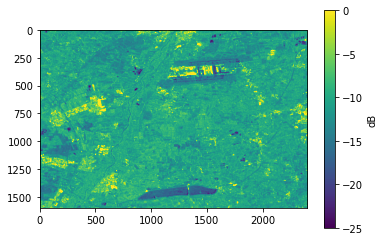

In [13]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    # Problem: border pixel might be zero or negative
    # pixel eqal or smaller than zero are set to nan
    array = np.copy(vv[x])
    array[array <= 0] = np.nan
    # plot backscatter data in dB scale
    plt.imshow(10*np.log10(array))
    cbar = plt.colorbar()
    cbar.set_label('dB')
    plt.clim(-25, 0)

interactive_plot = interactive(f, x=(0,len(vv)-1))
interactive_plot